# Breast Cancer DEtection - Logistic Regression

Breast cancer is one of the most common cancers among women worldwide. Early detection and accurate diagnosis are crucial for successful treatment and improved survival rates. This project mainly uses logistic regression to build a model to predict whether cancer is malignant.

This study utilized the Wisconsin Diagnostic Breast Cancer (WDBC) dataset, which contains features computed from digitized images of FNA breast tissue specimens. The primary goal is to classify breast masses as malignant (M) or benign (B) based on various cellular characteristics.

### Project Objectives
1. Develop an logistic regression model for breast cancer diagnosis
2. Identify the most significant features for cancer detection

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Characteristics
- **Source**: University of Wisconsin Hospitals
- **Total Samples**: 569 cases
  - Benign cases: 357
  - Malignant cases: 212
- **Features**: 30 numerical features derived from cell nucleus measurements
- **Target Variable**: Diagnosis (Binary classification: M/B)

In [30]:
df = pd.read_csv("data/data.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

### Data Cleaning

<Axes: >

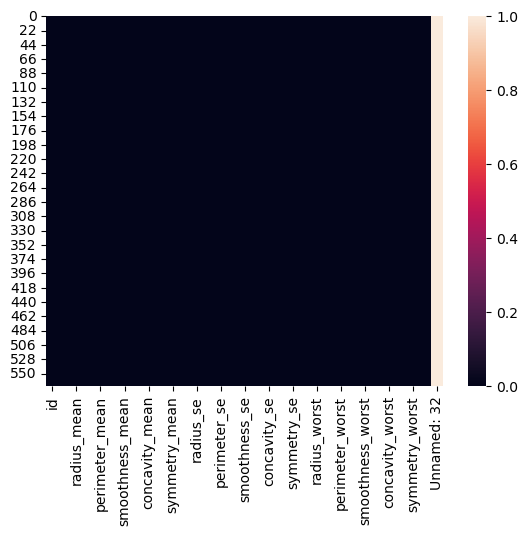

In [33]:
# Using heatmap to check data
sns.heatmap(df.isnull())

In [34]:
df.drop(["id", "Unnamed: 32"], inplace=True, axis=1)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [35]:
df.diagnosis = [1 if value == "M" else 0 for value in df.diagnosis]
# df["diagnosis"] = df["diagnosis"].astype("category", copy=False)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

<Axes: xlabel='diagnosis'>

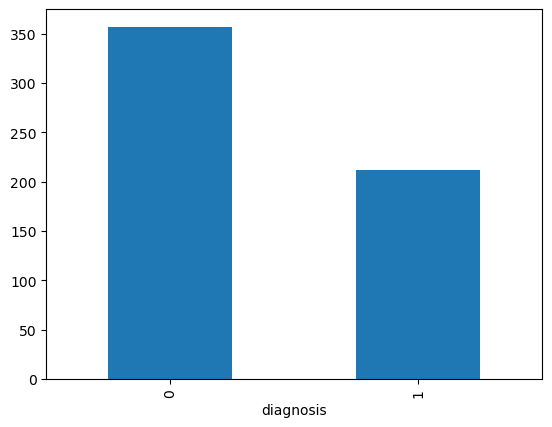

In [36]:
df["diagnosis"].value_counts().plot(kind="bar")

### Training and Testing Model

In [38]:
# Divide df into target variable and predictors
y = df["diagnosis"] # target
X = df.drop(["diagnosis"], axis=1) # predictors
print(y.info, X.info)

<bound method Series.info of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64> <bound method DataFrame.info of      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60

### Normalize data

In [41]:

from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit the scaler to data and transform the data
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Split data

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42)

## Train model

In [49]:
from sklearn.linear_model import LogisticRegression

# Create the logistice regressoin model
lr = LogisticRegression()

# Train the model on the train dataset
lr.fit(X_train, y_train)

# Make prediction
y_pred = lr.predict(X_test)

In [50]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

## Evaluation

## Machine Learning Evaluation Metrics Note

### Basic Definitions
- **True Positive (TP)**: Correctly identified as positive
- **True Negative (TN)**: Correctly identified as negative  
- **False Positive (FP)**: Incorrectly identified as positive (Type I error)
- **False Negative (FN)**: Incorrectly identified as negative (Type II error)

### Key Metrics

#### 1. Accuracy
- **Definition**: Proportion of correct predictions
- **Formula**: (TP + TN) / (TP + TN + FP + FN)
- **Use Case**: Suitable for balanced datasets
- **Limitation**: Can be misleading for imbalanced datasets

#### 2. Precision
- **Definition**: Proportion of correct positive predictions
- **Formula**: TP / (TP + FP)
- **Use Case**: Important when false positives are costly
- **Significance**: Avoids over-diagnosis/misclassification

#### 3. Recall (Sensitivity)
- **Definition**: Proportion of actual positives correctly identified
- **Formula**: TP / (TP + FN)
- **Use Case**: Important when false negatives are costly
- **Significance**: Avoids missed diagnoses

#### 4. F1-Score
- **Definition**: Harmonic mean of Precision and Recall
- **Formula**: 2 * (Precision * Recall) / (Precision + Recall)
- **Use Case**: When balance between Precision and Recall is needed
- **Characteristics**: 
  - Considers both false positives and negatives
  - Range: 0 to 1 (1 being best)

#### 5. Support
- **Definition**: Number of samples in each class
- **Purpose**: Understanding data distribution
- **Importance**: Evaluating data balance
- **Impact on Other Metrics**:
  - **Accuracy Impact**:
    - Larger support classes heavily influence overall accuracy
    - Errors in smaller support classes may be masked
  - **F1-Score Impact**:
    - Different support levels may bias F1-scores
    - Weighted F1-scores should be considered


In [58]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.97


In [60]:
print(f"Model Evaluation Results:\n {classification_report(y_test, y_pred)}")

Model Evaluation Results:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Model Evaluation Analysis

### Class-wise Performance (0: Benign, 1: Malignant)

#### Class 0 (Benign)
- **Precision**: 0.97 (97%)
  - Of all predicted benign cases, 97% were correctly identified
- **Recall**: 0.99 (99%)
  - Of all actual benign cases, 99% were successfully detected
- **F1-Score**: 0.98 (98%)
  - Strong balanced performance for benign cases
- **Support**: 71 samples
  - Represents majority class in test set

#### Class 1 (Malignant)
- **Precision**: 0.98 (98%)
  - Of all predicted malignant cases, 98% were correctly identified
- **Recall**: 0.95 (95%)
  - Of all actual malignant cases, 95% were successfully detected
- **F1-Score**: 0.96 (96%)
  - Strong balanced performance for malignant cases
- **Support**: 43 samples
  - Represents minority class in test set

### Overall Model Performance
- **Accuracy**: 0.97 (97%)
  - Model correctly classified 97% of all cases
- **Macro Average**: 0.97
  - Simple average across classes, indicating balanced performance
- **Weighted Average**: 0.97
  - Average weighted by class support, confirming consistent performance

## Key Insights
1. **High Overall Performance**: 
   - Model shows excellent performance with 97% accuracy

2. **Balanced Performance**:
   - Similar metrics across both classes
   - No significant bias towards either class

3. **Clinical Relevance**:
   - High recall (0.95) for malignant cases minimizes dangerous false negatives
   - High precision (0.98) for malignant cases minimizes unnecessary concerns

4. **Data Distribution**:
   - Slightly imbalanced dataset (71 benign vs 43 malignant)
   - Model maintains good performance despite imbalance



## Conclusion
The model demonstrates excellent and balanced performance in breast cancer detection, making it potentially valuable for clinical support. The high recall for malignant cases is particularly important for medical applications where missing a cancer diagnosis would be costly.